In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"]= 8,4
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [75]:
# Import data and read
data = pd.read_csv("C:\\Users\\nipin\\Documents\\Python\\Heart Disease Data\\heart.csv")

In [76]:
# Top five rows of the data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains; 

age - age in years
sex - (1 = male; 0 = female) 
cp - chest pain type 
trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
chol - serum cholestoral in mg/dl 
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
restecg - resting electrocardiographic results 
thalach - maximum heart rate achieved 
exang - exercise induced angina (1 = yes; 0 = no) 
oldpeak - ST depression induced by exercise relative to rest 
slope - the slope of the peak exercise ST segment 
ca - number of major vessels (0-3) colored by flourosopy 
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
target - have disease or not (1=yes, 0=no)

Data Exploration

In [77]:
# Bottom 5 rows
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [78]:
# data info as str function in R

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [79]:
# Data description as summary function in R
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [80]:
# Find out Name of the columns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

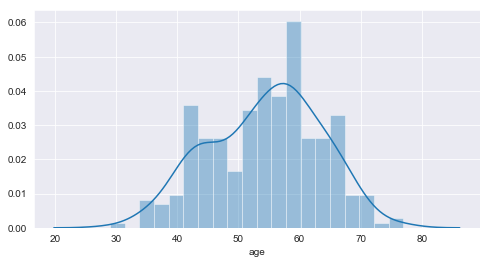

In [81]:
sns.set_style("darkgrid")
sns.distplot(data["age"],bins = 20)
plt.show()

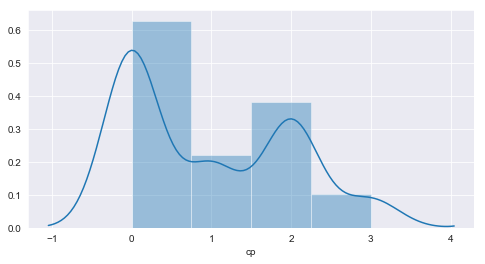

In [82]:
sns.distplot(data["cp"], bins = 4)
plt.show()

In [83]:
# Data exploration
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

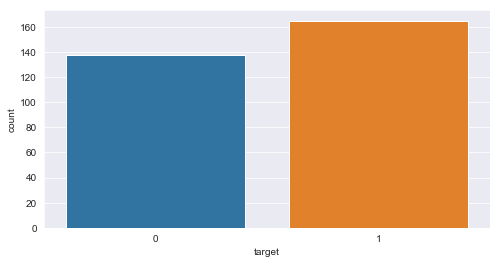

In [84]:
sns.countplot( x= "target", data = data)
plt.show()

In [85]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
# How to put percentage in the text after 2 digit
print("Percentge of Patient haven't Heart Disease: {:.2f}%".format(countNoDisease/len(data.target)*100))
print("Percentage of Patient have hart Disease:{:.2f}%".format(countHaveDisease/len(data.target)*100))                                                                    


Percentge of Patient haven't Heart Disease: 45.54%
Percentage of Patient have hart Disease:54.46%


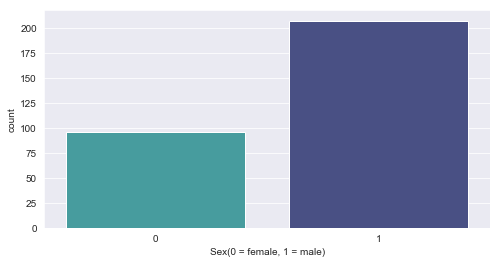

In [86]:
sns.countplot( x = "sex", data = data, palette = "mako_r")
plt.xlabel("Sex(0 = female, 1 = male)")
plt.show()

In [87]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex ==1])
print("Percentage of female patient:{:.2f}%".format(countFemale/len(data.sex)*100))
print("Percentage of Male Patient:{:.2f}%".format(countMale/len(data.sex)*100))

Percentage of female patient:31.68%
Percentage of Male Patient:68.32%


In [88]:
data.groupby("target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


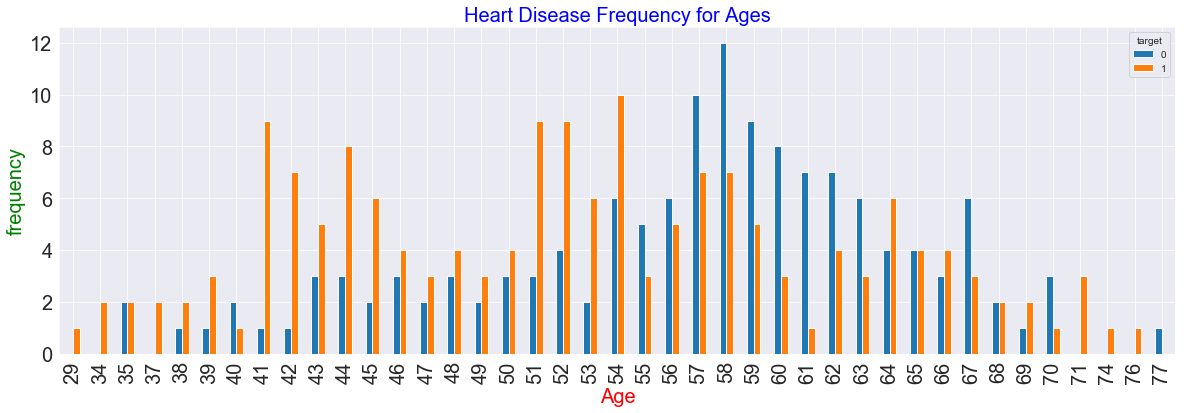

In [217]:
pd.crosstab(data.age,data.target).plot(kind = "bar", figsize = (20,6))
plt.title("Heart Disease Frequency for Ages", fontsize = 20, color = "Blue")
plt.xlabel("Age", fontsize = 20, color = "Red")
plt.ylabel("frequency", fontsize = 20, color = "Green")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig("heartDiseaseAndAges.png")
plt.show()

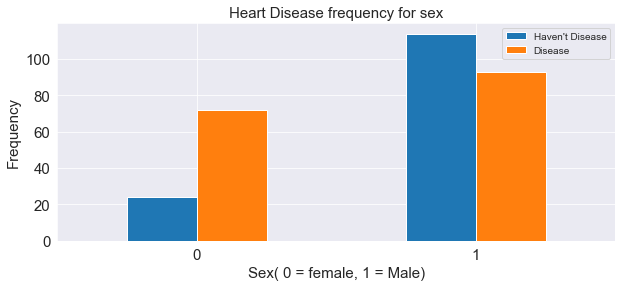

In [216]:
pd.crosstab(data.sex, data.target).plot(kind = "bar", figsize = (10,4))
plt.title("Heart Disease frequency for sex", fontsize = 15)
plt.xlabel("Sex( 0 = female, 1 = Male)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.xticks(rotation = 0,fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(["Haven't Disease","Disease"],fontsize = 10)
plt.show()

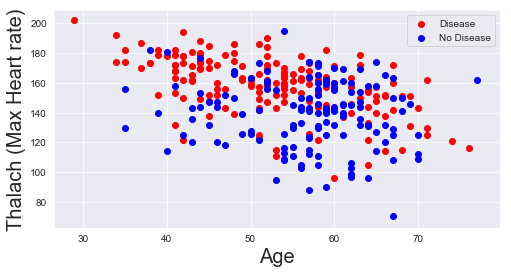

In [147]:
plt.scatter(x = data.age[data.target ==1],y = data.thalach[(data.target==1)], c = "red")
plt.scatter(x = data.age[data.target ==0], y = data.thalach[(data.target ==0)], c= "blue")
plt.legend(["Disease","No Disease"])
plt.xlabel("Age", fontsize = 20)
plt.ylabel("Thalach (Max Heart rate)", fontsize = 20)
plt.show()

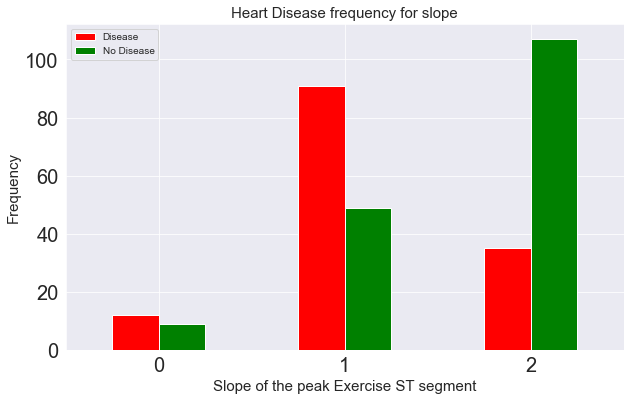

In [219]:
pd.crosstab(data.slope, data.target).plot(kind = "bar", figsize = (10,6), color =["red","green"])
plt.title("Heart Disease frequency for slope", fontsize = 15)
plt.xlabel("Slope of the peak Exercise ST segment", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.legend(["Disease", "No Disease"])
plt.xticks( fontsize = 20, rotation = 0)
plt.yticks(fontsize = 20)
plt.show()


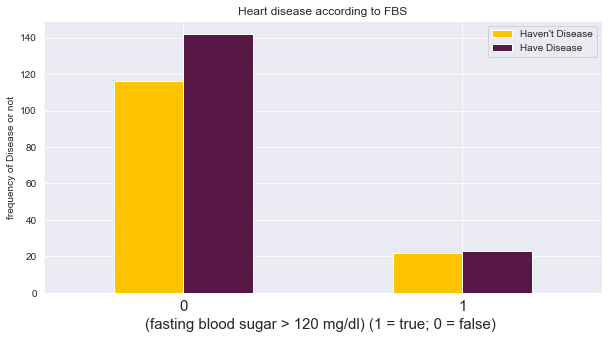

In [194]:
pd.crosstab(data.fbs,data.target).plot(kind = "bar", figsize = (10,5),color = ["#FFC300","#581845"])
plt.title("Heart disease according to FBS")
plt.xlabel("(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) ", fontsize = 15)
plt.ylabel("frequency of Disease or not")
plt.xticks(rotation = 0, fontsize = 15)
plt.legend(["Haven't Disease","Have Disease"])
plt.show()

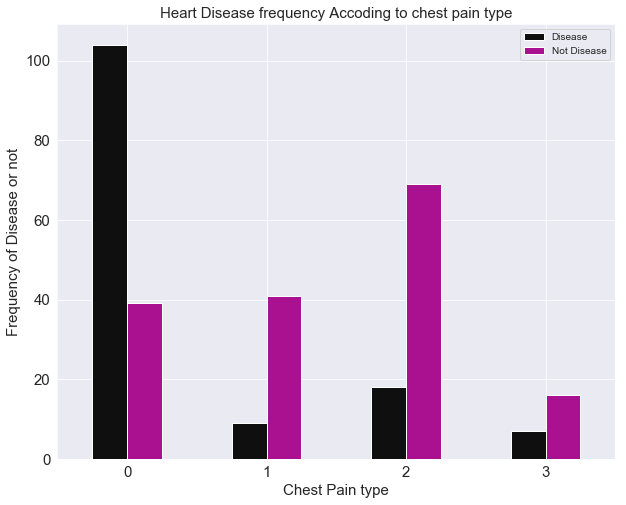

In [210]:
data.cp.astype("category")
pd.crosstab(data.cp, data.target).plot(kind = "bar", figsize = (10,8), color =["#0F0F0F","#AA1190"] )
plt.title("Heart Disease frequency Accoding to chest pain type", fontsize = 15)
plt.xlabel("Chest Pain type", fontsize = 15)
plt.ylabel("Frequency of Disease or not", fontsize = 15)
plt.legend(["Disease","Not Disease"])
plt.xticks(rotation = 0, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()
                                      

Creating Model for Logistic Regression
We can use sklearn library or we can write our own function.

In [214]:
y = data.target.values
x_data = data.drop(["target"], axis = 1)
x_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [220]:
# Normalize Data
x = (x_data- np.min(x_data))/(np.max(x_data)- np.min(x_data)).values


In [221]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [238]:
# Split the data set into 80:20 train and test data sets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =2)
#print(x_train)
#print(x_test)

In [241]:
# Fitting Logistic regression to the training set
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [244]:
#Predicting the test set results
y_pred = classifier.predict(x_test)

In [249]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[24,  8],
       [ 1, 28]], dtype=int64)

In [269]:
# Accuracy
a = (24+28)*100/(24+28+8+1)
a
#print("Accuracy of Logistic regression is {:.2}%".format(a))

Accuracy of Logistic regression is 8.5e+01%


### 